In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [24]:
np.set_printoptions(suppress=True)
X = np.random.uniform(-1,1,(1000,10))
print(X)
y1= np.add(X[:,0:1],X[:,1:2]*X[:,1:2],X[:,2:3])
y2 = np.add(X[:,3:4],np.sin(X[:,4:5]),X[:,5:6])
y3 = np.add(7*X[:,6:7],8*np.exp(X[:,7:8]),X[:,8:9])
y4 = X[:,9:10]
Y=np.round(np.add(np.add(y1,y2),np.add(y3,y4)),decimals=3)
# print(Y)
print(np.amax(Y))
# Y=2*(Y-np.amin(Y))/(np.amax(Y)-np.amin(Y))-1
Y1=activate_sigmoid(Y)
print(np.amax(Y1))
print(np.amin(Y1))

[[ 0.7912961  -0.53097984 -0.52301248 ...  0.60970894 -0.82754309
   0.59245931]
 [-0.64594179  0.66591976  0.98505918 ... -0.7653912  -0.73068828
  -0.87699786]
 [ 0.31751761 -0.02606452 -0.96781802 ...  0.09178838 -0.17817861
   0.8528422 ]
 ...
 [-0.20114488 -0.55123666  0.36803628 ... -0.61433145  0.84552069
   0.62545851]
 [-0.38886587 -0.22431895 -0.86648223 ... -0.69459037 -0.35933455
  -0.68230852]
 [-0.45985226  0.24838819  0.23470791 ...  0.59554197 -0.08425633
  -0.98704639]]
28.233
0.9999999999989044
-0.9891575769468344


In [25]:
def print_network(net):
    for i,layer in enumerate(net,1):
        print("Layer {} ".format(i))
        for j,neuron in enumerate(layer,1):
            print("neuron {} :".format(j),neuron)

In [26]:
def initialize_network():
    
    input_neurons=len(X[0])
    hidden_neurons=input_neurons+1
    output_neurons=1
    
    n_hidden_layers=1
    
    net=list()
    
    for h in range(n_hidden_layers):
        if h!=0:
            input_neurons=len(net[-1])
            
        hidden_layer = [ { 'weights': np.random.uniform(size=input_neurons)} for i in range(hidden_neurons) ]
        net.append(hidden_layer)
    
    output_layer = [ { 'weights': np.random.uniform(size=hidden_neurons)} for i in range(output_neurons)]
    net.append(output_layer)
    
    return net

In [27]:
net=initialize_network()
print_network(net)

Layer 1 
neuron 1 : {'weights': array([0.49344204, 0.89352952, 0.24344579, 0.37894398, 0.50383944,
       0.92701021, 0.99439309, 0.52371865, 0.68109451, 0.62222214])}
neuron 2 : {'weights': array([0.83465729, 0.78044629, 0.51698119, 0.22148646, 0.20659294,
       0.38349899, 0.93120107, 0.93230758, 0.2290321 , 0.20997536])}
neuron 3 : {'weights': array([0.13672196, 0.40103237, 0.82859676, 0.19772681, 0.28367529,
       0.82567013, 0.18216213, 0.13600001, 0.81396298, 0.38014902])}
neuron 4 : {'weights': array([0.07265658, 0.98864143, 0.08221837, 0.1727424 , 0.83964969,
       0.21686748, 0.41950696, 0.35863896, 0.91009129, 0.17643428])}
neuron 5 : {'weights': array([0.3329749 , 0.10599792, 0.57719882, 0.52080457, 0.74799238,
       0.93615447, 0.96777207, 0.29223039, 0.51184668, 0.77582669])}
neuron 6 : {'weights': array([0.87022682, 0.50842543, 0.85261865, 0.32965519, 0.31513824,
       0.02965995, 0.26991218, 0.0185183 , 0.71629273, 0.74660344])}
neuron 7 : {'weights': array([0.11846

In [28]:
def activate_sigmoid(sum):
    return (2/(1+np.exp(-sum))-1)

In [29]:
def forward_propagation(net,input):
    row=input
    for layer in net:
        prev_input=np.array([])
        for neuron in layer:
            sum=neuron['weights'].T.dot(row)
            
            result=activate_sigmoid(sum)
            neuron['result']=result
            prev_input=np.append(prev_input,[result])
        row=prev_input
    return row


In [30]:
def sigmoidDerivative(output):
    return (0.5*(1.0-output*output))

In [31]:
def back_propagation(net,row,expected):
     for i in reversed(range(len(net))):
            layer=net[i]
            errors=np.array([])
            if i==len(net)-1:
                results=[neuron['result'] for neuron in layer]
                errors = expected-np.array(results)
            else:
                for j in range(len(layer)):
                    herror=0
                    nextlayer=net[i+1]
                    for neuron in nextlayer:
                        herror+=(neuron['weights'][j]*neuron['delta'])
                    errors=np.append(errors,[herror])
            
            for j in range(len(layer)):
                neuron=layer[j]
                neuron['delta']=errors[j]*sigmoidDerivative(neuron['result'])

In [32]:
def updateWeights(net,input,lrate):
    
    for i in range(len(net)):
        inputs = input
        if i!=0:
            inputs=[neuron['result'] for neuron in net[i-1]]

        for neuron in net[i]:
            for j in range(len(inputs)):
                neuron['weights'][j]+=lrate*neuron['delta']*inputs[j]

In [33]:
def training(net, epochs,lrate,n_outputs):
    errors=[]
    for epoch in range(epochs):
        sum_error=0
        for i,row in enumerate(X):
            outputs=forward_propagation(net,row)
#             expected = [0 for i in range(n_outputs)]
#             expected[row[-1]] = 1    
            sum_error+=0.5*(math.pow((Y1[i]-outputs),2))
#             print(sum_error)
            back_propagation(net,row,Y1[i])
            updateWeights(net,row,0.05)
        errors.append(sum_error)
#         print('>epoch=%d,error=%.3f'%(epoch,sum_error))
    return errors

In [34]:
errors=training(net,10, 0.01,1)

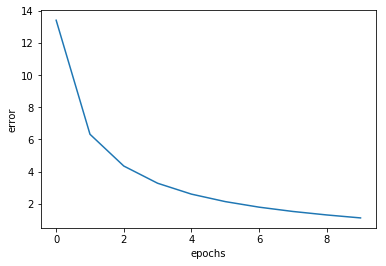

In [35]:
epochs = []
for i in range(10):
    epochs.append(i)
plt.plot(epochs,errors)
plt.xlabel("epochs")
plt.ylabel('error')
plt.show()

In [36]:
def predict(network, row):
    outputs = forward_propagation(net, row)
    return outputs

In [37]:
Xpred = X
Ypred=Y1
predarr=[]
# print(Y)
Y1=activate_sigmoid(Y)
for i,row in enumerate(Xpred):
    if(i==15):
        break
    pred=predict(net,row)
    output=(pred)
    predarr.append(pred)
print(len(predarr))

15


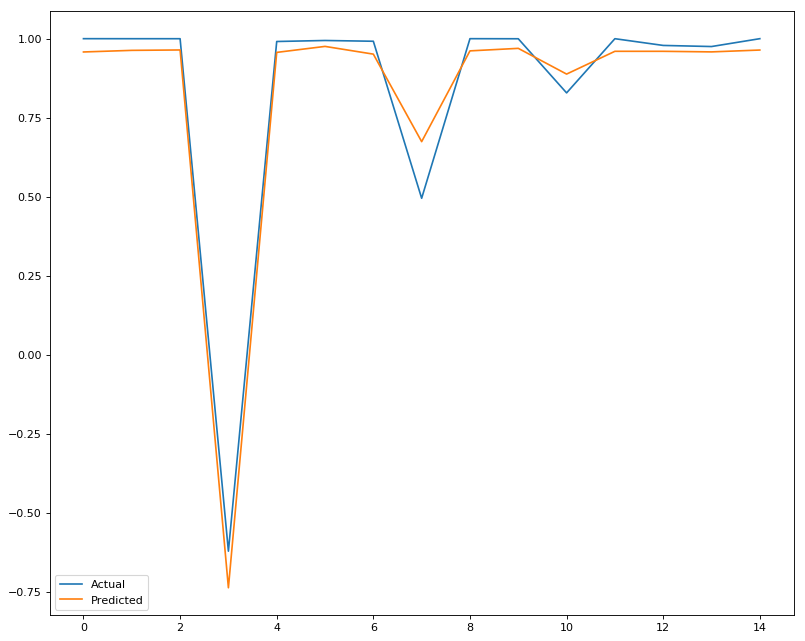

[array([0.9579565]), array([0.96305036]), array([0.964303]), array([-0.73664195]), array([0.95660916]), array([0.9755716]), array([0.95110984]), array([0.67433633]), array([0.96143198]), array([0.96937266]), array([0.88802098]), array([0.96006043]), array([0.96003032]), array([0.95820292]), array([0.96406115])]
[array([0.99999999]), array([0.99991441]), array([0.99987975]), array([-0.62091942]), array([0.9910699]), array([0.9942796]), array([0.99184349]), array([0.49525549]), array([0.99999987]), array([0.99973743]), array([0.82855205]), array([0.99993062]), array([0.97862637]), array([0.9751367]), array([0.99999193])]


In [56]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
epochs = []
Y12 = []
X12 = []
for i in range(15):
    epochs.append(i)
    Y12.append(Ypred[i])
    X12.append(X[i])
plt.plot(epochs, Y12)
plt.plot(epochs, predarr)
plt.legend(['Actual', 'Predicted'])
plt.show()
print(predarr)
print(Y12)

In [57]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  
linear_regressor.fit(X12, Y12)  # perform linear regression
Y_pred = linear_regressor.predict(X12)  # make predictions
print(Y_pred)

[[ 0.99185855]
 [ 0.95554014]
 [ 1.19611408]
 [-0.3425192 ]
 [ 1.17327046]
 [ 0.69377533]
 [ 0.65293357]
 [ 0.66398378]
 [ 1.12531932]
 [ 1.00520935]
 [ 0.65404908]
 [ 1.18389724]
 [ 0.96266396]
 [ 0.82246669]
 [ 0.89473585]]


ValueError: x and y must be the same size

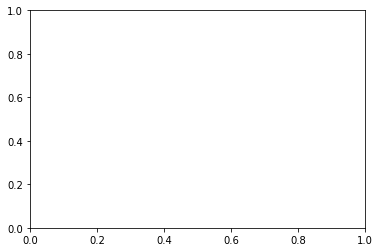

In [59]:
plt.scatter(X12, Y12)
plt.plot(X12, Y_pred, color='red')
plt.show()